#Assignment 1

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

###Import Libraries

In [1]:
"""
Importing all the libraries required for this assignment
"""

import nltk
import os
import math
import scipy
import random 
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.use('nbagg')
from tqdm import tqdm
import numpy as np
import collections
import pandas as pd
from operator import add
import  tensorflow as tf
from urllib import request
from itertools import chain
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from matplotlib.pyplot import figure
from collections import OrderedDict
import gensim.downloader as gloader
from collections import OrderedDict, Counter
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import (Input, LayerNormalization, LSTM, Dense, Bidirectional, GRU, Embedding)

In [2]:
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Creating Directories for storing dataset


In [3]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

Current work directory: /content
Cleaned


### Downloading the Dataset & Extraction

In [4]:
from urllib import request
import zipfile

# Config
print("Current work directory: {}".format(os.getcwd()))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"

dataset_path = os.path.join(dataset_folder, "dependency_treebank.zip")

print(dataset_path)

def download_dataset(download_path: str, url: str):
    if not os.path.exists(download_path):
        print("Downloading dataset...")
        request.urlretrieve(url, download_path)
        print("Download complete!")

def extract_dataset(download_path: str, extract_path: str):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path) as loaded_tar:
        loaded_tar.extractall(extract_path)
        print(loaded_tar)
    print("Extraction completed!")

# Download
download_dataset(dataset_path, url)

# Extraction
extract_dataset(dataset_path, dataset_folder)

Current work directory: /content
/content/Datasets/dependency_treebank.zip
Download complete!
Extracting dataset... (it may take a while...)
<zipfile.ZipFile filename='/content/Datasets/dependency_treebank.zip' mode='r'>
Extraction completed!


### Splitting the dataset into train, test & val

In [5]:
def split_Train_Test_Val(i):
    if i < 100:
        return 'train'
    elif i < 150:
        return 'val'
    else:
        return 'test'

In [6]:
dataset_name = "dependency_treebank"
debug = True

folder = os.path.join(os.getcwd(), "Datasets", dataset_name)
files=os.listdir(folder)
files.sort()
dataframe_rows = {'train': [], 'val':[], 'test':[]}
for i, filename in enumerate(files):
  file_path = os.path.join(folder, filename)
  try:
        if os.path.isfile(file_path):
              l1, l2 = [], []
              with open(file_path, mode='r', encoding='utf-8') as text_file:
                for line in text_file:
                    tokens = line.split("\t")[:2]
                    if len(tokens) == 2:
                          l1.append(tokens[0])
                          l2.append(tokens[1])
                    if tokens[0] == '.':
                      dataframe_rows[split_Train_Test_Val(i)].append({"tokens":l1, "tags": l2})
                      l1, l2 = [], []
  except Exception as e:
        print('Failed to process %s. Reason: %s' % (file_path, e))
        sys.exit(0)


df_train = pd.DataFrame(dataframe_rows['train'])
df_val = pd.DataFrame(dataframe_rows['val'])
df_test = pd.DataFrame(dataframe_rows['test'])

### Shapes of the datasets obtained

In [7]:
print('Shape of Train',df_train.shape)
print('Shape of Val',df_val.shape)
print('Shape of Test',df_test.shape)

Shape of Train (1936, 2)
Shape of Val (1256, 2)
Shape of Test (636, 2)


In [8]:
df_train.head()

,tokens,tags
0,"[Pierre, Vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,"[Mr., Vinken, is, chairman, of, Elsevier, N.V....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,"[Rudolph, Agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,"[A, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,"[The, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."


In [9]:
df_val.head()

,tokens,tags
0,"[A, House-Senate, conference, approved, major,...","[DT, NNP, NN, VBD, JJ, NNS, IN, DT, NN, IN, JJ..."
1,"[For, the, Agency, for, International, Develop...","[IN, DT, NNP, IN, NNP, NNP, ,, NNS, VBD, $, CD..."
2,"[The, conference, approved, at, least, $, 55, ...","[DT, NN, VBD, IN, JJS, $, CD, CD, IN, JJ, NN, ..."
3,"[The, agreement, on, Poland, contrasts, with, ...","[DT, NN, IN, NNP, VBZ, IN, DT, JJ, NNS, VBG, I..."
4,"[These, fiscal, pressures, are, also, a, facto...","[DT, JJ, NNS, VBP, RB, DT, NN, IN, VBG, DT, NN..."


In [10]:
df_test.head()

,tokens,tags
0,"[Intelogic, Trace, Inc., ,, San, Antonio, ,, T...","[NNP, NNP, NNP, ,, NNP, NNP, ,, NNP, ,, VBD, P..."
1,"[The, move, boosts, Intelogic, Chairman, Asher...","[DT, NN, VBZ, NNP, NNP, NNP, NNP, POS, NN, TO,..."
2,"[Mr., Ackerman, already, is, seeking, to, oust...","[NNP, NNP, RB, VBZ, VBG, TO, VB, NNP, NNP, IN,..."
3,"[The, action, followed, by, one, day, an, Inte...","[DT, NN, VBN, IN, CD, NN, DT, NNP, NN, IN, PRP..."
4,"[In, New, York, Stock, Exchange, composite, tr...","[IN, NNP, NNP, NNP, NNP, JJ, NN, NN, ,, NNP, N..."


### Distribution of train, val & test datasets

In [11]:
def percentage(value,TrueValue):
  return int((value/TrueValue)*100)

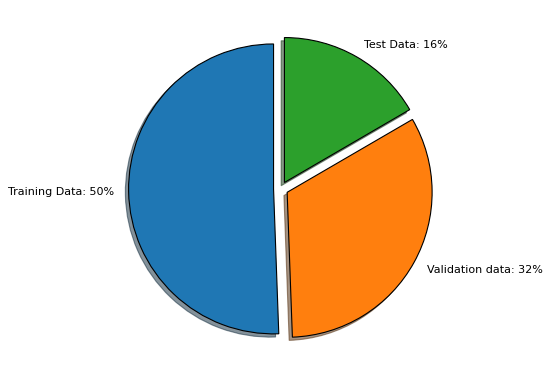

In [12]:
plt.figure(figsize=(6, 6), dpi=80)
explode_ = (0.05, 0.05, 0.05)
l1=df_train.shape[0]
l2=df_val.shape[0]
l3=df_test.shape[0]
total=l1+l2+l3
y=np.array([l1, l2, l3])
mylabels=['Training Data: {}%'.format(round(percentage(l1, total), 2)), 'Validation data: {}%'.format(round(percentage(l2, total), 2)), 'Test Data: {}%'.format(round(percentage(l3, total), 2))]
plt.pie(y, labels=mylabels, explode=explode_,startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth':1}, shadow=True)
plt.show()

### Co-occurrence matrix

In [13]:
def co_occurrence_count(df, idx_to_word, window_size=1, sparse=True):
    vocab_size = len(idx_to_word)
    if sparse:
        co_occurrence_matrix = scipy.sparse.lil_matrix((len(idx_to_word), len(idx_to_word)), dtype=int)
    else:
        co_occurrence_matrix = np.zeros(shape=(vocab_size, vocab_size), dtype='float32')

    for doc in tqdm(df["tokens"]):
        for i, token in enumerate(doc):          
            window = doc[max(i-window_size, 0) : i+window_size+1]
            for dd in window: co_occurrence_matrix[token, dd] += 1           
    co_occurrence_matrix[np.diag_indices(vocab_size)] = 0
    if sparse:
        return scipy.sparse.csr_matrix(co_occurrence_matrix)
    return co_occurrence_matrix

### Building Vocabulary

In [14]:
def build_Vocabulary(words, particular_tokens=[]):
    words = words.map(lambda s: Counter([w.lower().strip() for w in s]))
    count = reduce(lambda a,b: a+b, words)
    word_to_index,index_to_word = OrderedDict(),OrderedDict()
    for i,w in enumerate(chain(particular_tokens, count)):
        word_to_index[w],index_to_word[i]= i,w
    return word_to_index, index_to_word

### Categorical Text

In [15]:
def to_categorical(df, word_to_index, tag_to_index):
    df['tokens'] = df['tokens'].map(lambda s: [word_to_index.get(w.lower().strip(), word_to_index[unknown]) for w in s])
    df['tags'] = df['tags'].map(lambda s: [tag_to_index.get(w.lower().strip()) for w in s])

###Inverting

In [16]:
def inverting(V):
  return {v:k for k,v in V.items()}

###Downloading GloVe embedding

In [17]:
def load_embedding_model(embedding_model_type,embedding_dimension):
    download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Invalid embedding model name! Check the embedding dimension:")
        print("Glove: 50, 100, 200, 300")
        raise e
    return emb_model 

embedding_dimension = 100 
print("Glove embedding:", embedding_dimension)
embedding_model = load_embedding_model('glove',embedding_dimension)

Glove embedding: 100
[==================================================] 100.0% 128.1/128.1MB downloaded


In [18]:
def combine_Vocabulary(previous_voc, add_voc):
    voc = previous_voc.copy()
    count = 0
    oov_terms = []
    for i, token in enumerate(add_voc.keys()):
        if token not in previous_voc.keys():
            oov_terms.append(token)
            voc[token] = count + len(previous_voc)
            count += 1
    return voc, oov_terms

###Handling OOV words

In [19]:
def build_embedding_matrix(embedding_model, oov_words, co_occurrence_matrix, word_to_index, index_to_word, randomize_OOV = False):
    for i, token in enumerate(oov_words):
        if randomize_OOV:
            oov_vec = np.random.rand(embedding_dimension)
        else:
            oov_vec = np.zeros(embedding_dimension)
            for count_row in co_occurrence_matrix[word_to_index[token]]:
                weights_acc = 0
                for count, index in zip(count_row.data, count_row.indices):
                    if index_to_word[index] not in oov_words:
                        weights_acc += count
                        oov_vec += count*embedding_model[index_to_word[index]]
            oov_vec/=weights_acc
        embedding_model.add(token, oov_vec)
    return embedding_model

### Padding and Unknown tokens

In [20]:
padding, unknown, = '<pad>', '<unk>'
pad_unk_vec = np.zeros((2, embedding_dimension)) 
pad_unk_vec[1] = np.random.rand(embedding_dimension)
tag_to_index, index_to_tag = build_Vocabulary(df_train['tags'], [padding, unknown])

In [21]:
index_to_tag

OrderedDict([(0, '<pad>'),
             (1, '<unk>'),
             (2, 'nnp'),
             (3, ','),
             (4, 'cd'),
             (5, 'nns'),
             (6, 'jj'),
             (7, 'md'),
             (8, 'vb'),
             (9, 'dt'),
             (10, 'nn'),
             (11, 'in'),
             (12, '.'),
             (13, 'vbz'),
             (14, 'vbg'),
             (15, 'cc'),
             (16, 'vbd'),
             (17, 'vbn'),
             (18, 'rb'),
             (19, 'to'),
             (20, 'prp'),
             (21, 'rbr'),
             (22, 'wdt'),
             (23, 'vbp'),
             (24, 'rp'),
             (25, 'prp$'),
             (26, 'jjs'),
             (27, 'pos'),
             (28, '``'),
             (29, 'ex'),
             (30, "''"),
             (31, 'wp'),
             (32, ':'),
             (33, 'jjr'),
             (34, 'wrb'),
             (35, '$'),
             (36, 'nnps'),
             (37, 'wp$'),
             (38, '-lrb-'),
           

In [22]:
tag_to_index

OrderedDict([('<pad>', 0),
             ('<unk>', 1),
             ('nnp', 2),
             (',', 3),
             ('cd', 4),
             ('nns', 5),
             ('jj', 6),
             ('md', 7),
             ('vb', 8),
             ('dt', 9),
             ('nn', 10),
             ('in', 11),
             ('.', 12),
             ('vbz', 13),
             ('vbg', 14),
             ('cc', 15),
             ('vbd', 16),
             ('vbn', 17),
             ('rb', 18),
             ('to', 19),
             ('prp', 20),
             ('rbr', 21),
             ('wdt', 22),
             ('vbp', 23),
             ('rp', 24),
             ('prp$', 25),
             ('jjs', 26),
             ('pos', 27),
             ('``', 28),
             ('ex', 29),
             ("''", 30),
             ('wp', 31),
             (':', 32),
             ('jjr', 33),
             ('wrb', 34),
             ('$', 35),
             ('nnps', 36),
             ('wp$', 37),
             ('-lrb-', 38),
           

### V1: GloVe vocabulary

In [23]:
V1 = {e:i for i,e in enumerate(chain([padding, unknown], embedding_model.vocab.keys()))}

### V2: Glove vocab + train vocabulary 

In [24]:
word_to_index_train, _ = build_Vocabulary(df_train['tokens'])
V2, oov1 = combine_Vocabulary(V1, word_to_index_train)
print(oov1)
percentage_oov1=percentage(len(oov1),len(word_to_index_train))
print(f"Found {len(oov1)} oov words:",percentage_oov1,"%")

['vinken', 'crocidolite', 'micronite', 'amphobiles', 'pathlogy', 'money-market', 'malizia', '352.7', 'money-fund', 'top-yielding', 'energy-services', 'capital-gains', 'vitulli', 'pianist-comedian', '100,980', '4,393,237', '3,288,453', '2,303,328', 'rexinger', '737.5', '1\\/2', '38.375', 'summer\\/winter', '500,004', '361,376', '30,841', '13,056', 'chinchon', 'product-design', 'cray-3', 'c-90', 'pro-forma', 'wheeland', 'electric-utility', 'intellectual-property', 'unfair-trade', '-lcb-', '-rcb-', 'search-and-seizure', 'video-viewing', 'lower-priority', 'less-serious', 'rapanelli', 'alurralde', '-lrb-', '-rrb-', 'built-from-kit', 'language-housekeeper', 'co-developers', 'moleculon', 'kalipharma', 'purepac', 'tarwhine', 'non-encapsulating', 'automotive-parts', 'akerfeldt', '16.125', 'gingl', 'chilver', 'securities-based', 'mortgage-based', 'floating-rate', '37-a-share', 'erbamont', 'yen-support', 'one-country', 'foreign-stock', 'pre-1917', 'pre-1933', '236.74', '236.79', '415.6', '415.8',

In [25]:
to_categorical(df_train, V2, tag_to_index)
occ1 = co_occurrence_count(df_train, inverting(V2), sparse=True)
embeding_model = build_embedding_matrix(embedding_model, oov1, occ1, V2, inverting(V2))
build_embedding_matrix_v2 = np.concatenate((pad_unk_vec, embedding_model.vectors.copy()))

100%|██████████| 1936/1936 [00:01<00:00, 1555.22it/s]


In [26]:
tokens_fd=nltk.probability.FreqDist(word_to_index_train)
list_l=list(tokens_fd.most_common())
min(list_l)[1]

5565

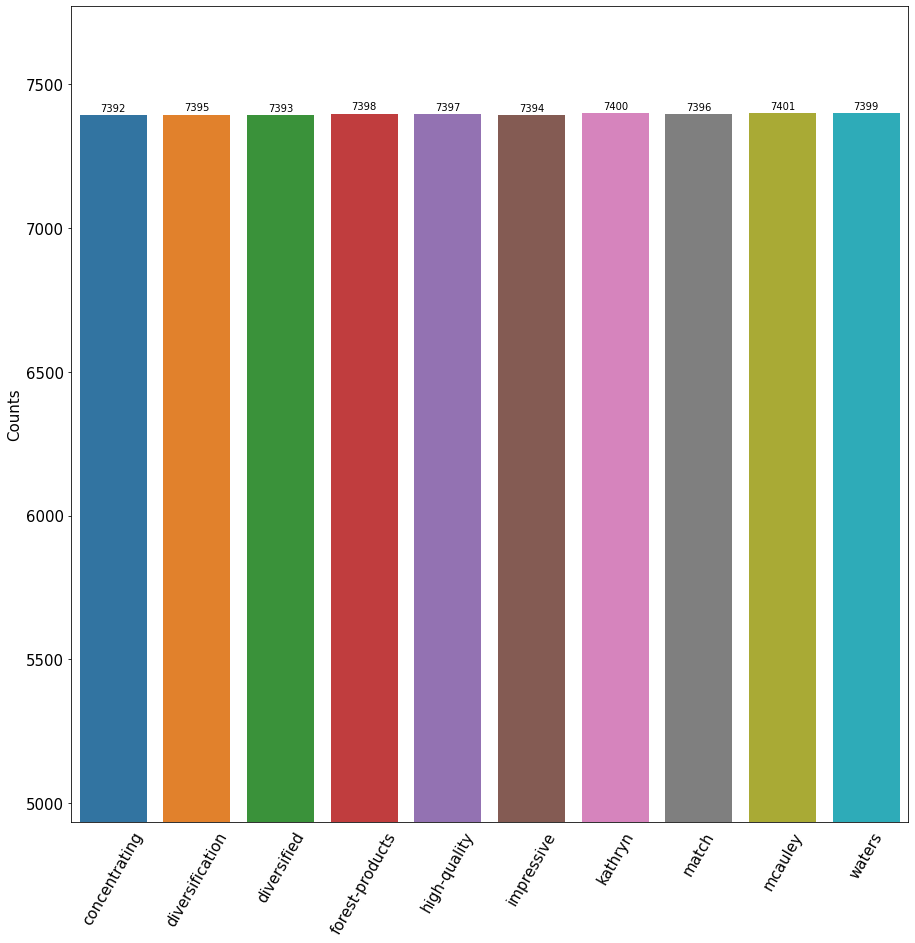

In [27]:
#matplotlib.use('nbagg')
tokens_fd=nltk.probability.FreqDist(word_to_index_train)
def plot_distribution(fd, N):
  keys=[i[0] for i in fd.most_common(N)]
  ord_keys=sorted(keys)
  values=[]
  for k in ord_keys:
    for i in fd.most_common(N):
      if i[0]==k:
        values.append(int(i[1]))
  
  plt.figure(figsize=(15, 15))
  ax=sns.barplot(x=ord_keys, y=values)
  for p in ax.patches:
    ax.annotate(format(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
  ax.grid(False)
  plt.xticks(fontsize=15, rotation=60)
  plt.ylabel('Counts', fontsize=15)
  plt.yticks(fontsize=15)

  list_values=[i[1] for i in fd.most_common()]
  y_min=min(list_values)+len(list_values)/1.5

  plt.ylim(y_min, None)
  ax.tick_params(bottom=False, left=True)
  for _,s in ax.spines.items():
      s.set_color('black')
  plt.show()

plot_distribution(tokens_fd, 10)

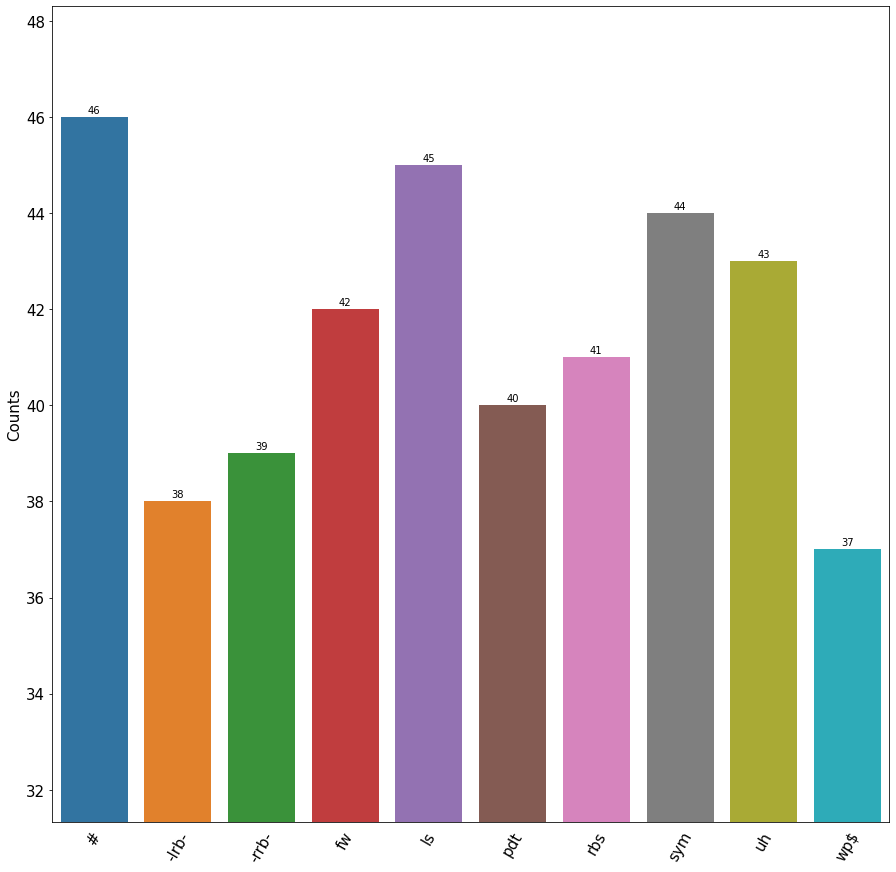

In [28]:
#matplotlib.use('nbagg')
tags_fd=nltk.probability.FreqDist(tag_to_index)
plot_distribution(tags_fd, 10)

### V3: Glove vocab + train vocabulary + val vocabulary

In [29]:
word_to_index_val, _ = build_Vocabulary(df_val['tokens'])
V3, oov2 = combine_Vocabulary(V2, word_to_index_val)
print(oov2)
percentage_oov2=percentage(len(oov2),len(word_to_index_val))
print(f"Found {len(oov2)} oov words:",percentage_oov2,"%")

['house-senate', '30,537', '23,403', 'four-foot-high', 'potables', 'scypher', 'cup-tote', 'mutchin', 'crane-safety', 'electrical-safety', 'corporate-wide', 'anku', 'substance-abusing', 'prevalance', 'breakey', 'housing-assistance', 'buy-outs', '300-113', 'airline-related', '271-147', 'labor-backed', 'two-time-losers', 'propagandizes', 'food-industry', '47.125', 'prudential-bache', 'freshbake', '877,663', 'bottom-line', '8.575', 'c.d.s', 'bank-backed', '13\\/16', '11\\/16', '7\\/16', '3\\/8', '6\\/2', 'ballantine\\/del', 'rey\\/fawcett', 'most-likely-successor', 'less-than-brilliant', 'severable', 'anti-deficiency', 'executive-office', 'one-house', 'then-speaker', 'sidak', 'price-support', 'disaster-assistance', 'land-idling', 'price-depressing', '238,000-circulation', 'one-newspaper', 'tire-kickers', 'lookee-loos', 'news-american', 'herald-american', 'much-larger', 'long-tenured', 'radio-station', 'car-care', 'truth-in-lending', 'card-member', 'express-buick', 'test-drive', 'capital-ma

In [30]:
to_categorical(df_val, V3, tag_to_index)
occ2 = co_occurrence_count(df_val, inverting(V3), sparse=True)
embeding_model = build_embedding_matrix(embedding_model, oov2, occ2, V3, inverting(V3))
build_embedding_matrix_v3 = np.concatenate((pad_unk_vec, embedding_model.vectors.copy()))

100%|██████████| 1256/1256 [00:00<00:00, 1289.67it/s]


### V4: Glove vocab + train vocabulary + val vocabulary + test vocabulary

In [31]:
word_to_index_test, _ = build_Vocabulary(df_test['tokens'])
v4, oov3 = combine_Vocabulary(V3, word_to_index_test)
print(oov3)
percentage_oov3=percentage(len(oov3),len(word_to_index_test))
print(f"Found {len(oov3)} oov words:",percentage_oov3,"%")

['intelogic', 'computer-services', 'above-market', '18-a-share', 'heavy-truck', 'passenger-car', '630.9', 'prior-year', 'sewing-machine', 'colorliner', 'newspaper-printing', 'launch-vehicle', 'weapons-modernization', '734.9', '811.9', '40-megabyte', 'more-advanced', '100-megabyte', '5,699', '6,799', 'life-of-contract', 'near-limit', '1.1650', 'disputado', 'copper-rich', '36-store', 'reupke', 'information-services', 'several-year', '43.875', 'unicorp', '45-a-share', 'conn.based', 'asset-valuation', 'hadson', 'blue-chips', '341.20', '319.75', '188.84', '154,240,000', 'arbitrage-related', 'early-retirement', '120-a-share', 'derchin', 'louisiana-pacific', 'ex-dividend', '372.14', '11,390,000', 'yet-to-be-formed', 'cents-a-unit', '618.1', '1.916', '1.637', 'seven-yen', 'hasbrouk', '158,666', '26,956', '608,413', '967,809', 'acquisition-minded', '87-store', 'waertsilae', '2,050-passenger', '361.8', 'bankruptcy-law', '19-month-old', 'pro-iranian', '11-month-old', '237-seat', 'tete-a-tete', 'g

In [32]:
to_categorical(df_test, v4, tag_to_index)
occ3 = co_occurrence_count(df_test, inverting(v4), sparse=True)
embeding_model = build_embedding_matrix(embedding_model, oov3, occ3, v4, inverting(v4))
build_embedding_matrix_v4 = np.concatenate((pad_unk_vec, embedding_model.vectors.copy()))

100%|██████████| 636/636 [00:00<00:00, 1582.50it/s]


###Distribution of OOV words

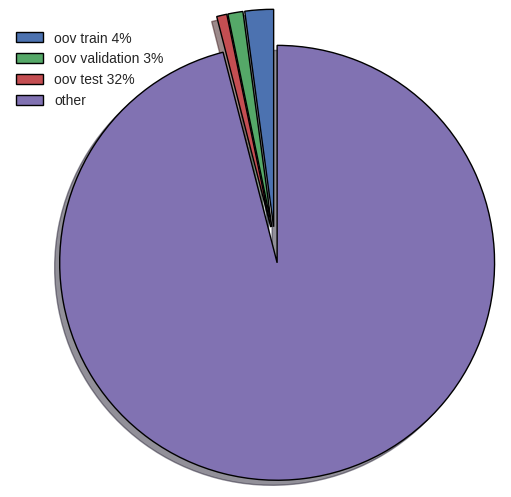

In [33]:
plt.style.use('seaborn')
plt.figure(figsize=(6, 6), dpi=100)
explode_=(0.1, 0.1, 0.1, 0.1)
total=len(word_to_index_val)+len(word_to_index_train)+len(word_to_index_test)
y=np.array([len(oov1), len(oov2), len(oov3), total])
mylabels=['oov train {}%'.format(round(percentage_oov1, 2)), 'oov validation {}%'.format(round(percentage_oov2, 2)), 'oov test {}2%'.format(round(percentage_oov3, 2)), 'other' ]
patches, texts=plt.pie(y, startangle=90,radius=1.2, wedgeprops={'edgecolor': 'black', 'linewidth':1}, explode=explode_, shadow=True)
plt.legend(patches, mylabels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)
plt.show();

###Data Loaders

In [34]:
class DataLoaders:
    def __init__(self, df, sequence, batch_size):
        self.X = df['tokens'].to_numpy()
        self.Y = df['tags'].to_numpy()

        assert self.X.shape[0] == self.Y.shape[0]
        self.sentence = self.X.shape[0]
        self.batch_size = batch_size

        self.data_list = []
        for i in range(self.sentence):
            m = np.zeros((sequence))
            n = np.zeros(sequence) + tag_to_index[padding]
            l = min(len(self.X[i]), sequence)
            m[:l] = self.X[i][:l]
            n[:l] = self.Y[i][:l]
            self.data_list.append((m, n))
        self.shuffle()

    def shuffle(self):
        self.current = 0
        random.shuffle(self.data_list)
        
        num_batches = math.ceil(self.sentence/self.batch_size)
        self.batches_x = []
        self.batches_y = []
        for i in range(num_batches):
            batchx = []
            batchy = []
            for j in range(self.batch_size):
                if i*batch_size+j >= self.sentence:
                    break
                batchx.append(self.data_list[i*self.batch_size+j][0])
                batchy.append(self.data_list[i*self.batch_size+j][1])
            self.batches_x.append(np.array(batchx))
            self.batches_y.append(np.array(batchy))


    def __iter__(self):
        return self

    def __next__(self):
        if self.current >= len(self.batches_x):
            raise StopIteration
        x = self.batches_x[self.current]
        y = self.batches_y[self.current]
        x = tf.cast(x, tf.float32)
        y = tf.cast(y, tf.float32)
        self.current += 1
        return x,y

#### Base Class Model

In [35]:
class RNN(Model):
    def __init__(self, vocab_size, sequence, embedding_matrix, batch_size):
        super(RNN, self).__init__()
        word_voc = embedding_matrix.shape[0]
        embedding_dim = embedding_matrix.shape[1]

        self.input_layer = Input(batch_input_shape=(batch_size, sequence))
        self.embedding_layer = Embedding(word_voc, embedding_dim,weights=[embedding_matrix], trainable=False,mask_zero=True)

    def build(self):
        return Model(inputs=[self.input_layer], outputs=self(self.input_layer))

    def weights(self, model):
        assert type(model).__name__ == type(self).__name__
        for layer, model_layer in zip(self.layers[1:], model.layers[1:]):
            layer.set_weights(model_layer.get_weights())

    def loss(self, y_true, predictions):
        mask = tf.math.logical_not(tf.math.equal(y, tag_to_index[padding]))
        sce = tf.keras.losses.sparse_categorical_crossentropy(y_true, predictions, from_logits=False)
        mask = tf.cast(mask, dtype=sce.dtype)
        sce *= mask
        return tf.reduce_sum(sce)/tf.reduce_sum(mask)

    def metrics(self, y_true, predictions, loss_obj, acc_obj, f1_obj):
        current_loss = self.loss(y_true, predictions)
        loss_obj.update_state(current_loss)
        p1 = tf.math.logical_or(tf.math.equal(y_true, tag_to_index[padding]),tf.math.equal(y, tag_to_index['.']))
        p2 = tf.math.logical_or(tf.math.equal(y_true, tag_to_index[',']),tf.math.equal(y, tag_to_index[':']))
        punctuation = tf.math.logical_or(p1, p2)
        punctuation = tf.math.equal(y, tag_to_index[padding])
        sample_weights = tf.math.logical_not(punctuation)
        pred_np = np.argmax(predictions, axis=2)
        acc_obj.update_state(y_true, pred_np, sample_weight=sample_weights)
        y_true_np = y.numpy().astype(np.int32)
        f1 = f1_score(y_true_np.flatten(), pred_np.flatten(), sample_weight=tf.reshape(sample_weights,[-1]),average='macro', zero_division=0, labels=[*tag_to_index.values()])
        f1_obj.update_state(f1)

###Bidirectional LSTM + Dense

In [36]:
class bilstm(RNN):
    def __init__(self, vocab_size, sequence, embedding_matrix, batch_size, lstm_dim):
        super(bilstm, self).__init__(vocab_size, sequence, embedding_matrix, batch_size)
        self.lstm = Bidirectional(LSTM(lstm_dim, return_state=True, return_sequences=True))
        self.fc = Dense(vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        lstm_o, lstmf_h, lstmf_c, lstmb_h, lstmb_c = self.lstm(embedded)
        output = self.fc(lstm_o)
        return output

###GRU + Dense 

In [37]:
class gru(RNN):
    def __init__(self, vocab_size, sequence, embedding_matrix, batch_size, gru_dim):
        super(gru, self).__init__(vocab_size, sequence, embedding_matrix, batch_size)
        self.gru = tf.keras.layers.GRU(gru_dim, return_state=True, return_sequences=True)
        self.fc = Dense(vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        gru_o, gru_s = self.gru(embedded)
        output = self.fc(gru_o)
        return output

###Bidirectional GRU + Dense

In [38]:
class bigru(RNN):
    def __init__(self, vocab_size, sequence, embedding_matrix, batch_size, gru_dim):
        super(bigru, self).__init__(vocab_size, sequence, embedding_matrix, batch_size)
        self.gru = Bidirectional(tf.keras.layers.GRU(gru_dim, return_state=True, return_sequences=True))
        self.fc = Dense(vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        gru_o, gru_sf, gru_sb = self.gru(embedded)
        output = self.fc(gru_o)
        return output

###BiLSTM_BiLSTM + Dense

In [39]:
class bilstm_bilstm(RNN): 
    def __init__(self, vocab_size, sequence, embedding_matrix, batch_size, lstm_dim):
        super(bilstm_bilstm, self).__init__(vocab_size, sequence, embedding_matrix, batch_size)
        self.lstm1 = Bidirectional(LSTM(lstm_dim, return_state=True, return_sequences=True))
        self.lstm2 = Bidirectional(LSTM(lstm_dim, return_state=True, return_sequences=True))
        self.fc = Dense(vocab_size, activation='softmax')
        
    def __call__(self, x):
        embedded = self.embedding_layer(x)
        lstm_o, lstmf_h, lstmf_c, lstmb_h, lstmb_c = self.lstm1(embedded)
        lstm_o, lstmf_h, lstmf_c, lstmb_h, lstmb_c = self.lstm2(lstm_o)
        output = self.fc(lstm_o)
        return output

In [40]:
def train_step(optimizer, model, x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = model.loss(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return predictions

def val_step(model, x):
    predictions = model(x)
    return predictions

###Hyperparameters

In [41]:
sequence = 128
batch_size =   128
max_epochs = 100
learning_rate = 0.01
latent_dim =   64

In [42]:
RNNModel1 = bigru
RNNModel2 = bilstm
RNNModel3 = bilstm_bilstm
RNNModel4 = gru

###First Model

In [43]:
train_loss_bigru_obj = tf.keras.metrics.Mean(name='train_loss')
train_f1_bigru_obj = tf.keras.metrics.Mean(name='train_f1')
train_acc_bigru_obj = tf.keras.metrics.Accuracy(name='train_accuracy')
val_loss_bigru_obj = tf.keras.metrics.Mean(name='val_loss')
val_f1_bigru_obj = tf.keras.metrics.Mean(name='val_f1')
val_acc_bigru_obj = tf.keras.metrics.Accuracy(name='val_accuracy')

In [44]:
tag_vocab_size = len(tag_to_index.keys())
model1 = RNNModel1(tag_vocab_size, sequence, build_embedding_matrix_v2, batch_size, latent_dim)
model1.build()

val_model1 = RNNModel1(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
val_model1.build()

first_model = RNNModel1(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
first_model.build()

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [46]:
train_data = DataLoaders(df_train, sequence, batch_size)
val_data = DataLoaders(df_val, sequence, batch_size)

In [47]:
def textExecution(model,modelNo):
  test_seq_len = 1000 
  test_model = model(tag_vocab_size, test_seq_len, build_embedding_matrix_v4, batch_size, latent_dim)
  test_model.build()
  test_model.weights(modelNo)
  test_loss_obj = tf.keras.metrics.Mean(name='test_loss')
  test_f1_obj = tf.keras.metrics.Mean(name='test_f1')
  test_acc_obj = tf.keras.metrics.Accuracy(name='test_accuracy')
  test_data = DataLoaders(df_test, test_seq_len, batch_size)
  test_data.shuffle()
  y_acc, pred_acc = [], []

  for x, y in test_data:
      predictions = val_step(test_model, x)
      test_model.metrics(y, predictions, test_loss_obj, test_acc_obj, test_f1_obj)
      y_acc += list(y.numpy().flatten())
      pred_acc += list(np.argmax(predictions, axis=2).flatten())
      test_loss=test_loss_obj.result().numpy()
      test_acc=test_acc_obj.result().numpy()
      test_f1=test_f1_obj.result().numpy()
  print("loss={} \t accuracy= {} \t f1-macro= {}".format(round(float(test_loss), 4), round(float(test_acc), 4),round(float(test_f1), 4)))
  confusion_matrix_function(y_acc, pred_acc)

### Analysis for the first model

In [48]:
train_loss_bigru_list=[]
train_acc_bigru_list=[]
train_f1_bigru_list=[]
val_loss_bigru_list=[]
val_acc_bigru_list=[]
val_f1_bigru_list=[]
train_bigru_ep=[]
val_bigru_ep=[]
max_val_loss = math.inf
improving = 0
max_iter = 1

In [49]:
train_bigru_ep

[]

In [50]:
errors_bigru = []
for epoch in range(max_epochs):
    train_loss_bigru_obj.reset_states()
    train_f1_bigru_obj.reset_states()
    train_acc_bigru_obj.reset_states()

    train_data.shuffle()
    errors_bigru = errors_bigru[:-10]
   
    for x,y in train_data:
        predictions = train_step(optimizer, model1, x, y)
        errors_bigru.append((x[np.argmax(predictions, axis = -1) != y], y, predictions))
        model1.metrics(y, predictions, train_loss_bigru_obj, train_acc_bigru_obj, train_f1_bigru_obj)
    train_loss_bigru_list.append(train_loss_bigru_obj.result())
    train_acc_bigru_list.append(train_acc_bigru_obj.result())
    train_f1_bigru_list.append(train_f1_bigru_obj.result())

    train_bigru_ep.append(epoch)
    print("------------------------Training------------------------------------")
    print("{}.  \tloss= {}  \t accuracy= {} \t f1-macro= {}".format(epoch, round(float(train_loss_bigru_obj.result().numpy()), 3),round(float(train_acc_bigru_obj.result().numpy()), 3),round(float(train_f1_bigru_obj.result().numpy()), 3)))
    
    # validation
    if epoch%5 == 4:
        val_loss_bigru_obj.reset_states()
        val_acc_bigru_obj.reset_states()
        val_f1_bigru_obj.reset_states()

        val_model1.weights(model1)
        val_data.shuffle()
        
        for x,y in val_data:
            predictions = val_step(val_model1, x)
            val_model1.metrics(y, predictions, val_loss_bigru_obj, val_acc_bigru_obj, val_f1_bigru_obj)
        val_loss_bigru_list.append(val_loss_bigru_obj.result())
        val_acc_bigru_list.append(val_acc_bigru_obj.result())
        val_f1_bigru_list.append(val_f1_bigru_obj.result())
        val_bigru_ep.append(epoch)
        print("------------------------Validation------------------------------------")
        print("{}.  \tloss= {}  \t  accuracy= {} \t  f1-macro= {}".format(epoch,round(float(val_loss_bigru_obj.result().numpy()), 3),round(float(val_acc_bigru_obj.result().numpy()), 3),round(float(val_f1_bigru_obj.result().numpy()), 3)))
        
        # early stopping
        if val_loss_bigru_obj.result() < max_val_loss:
            first_model.weights(val_model1)
            max_val_loss = val_loss_bigru_obj.result()
            improving = 0
        else:
            improving += 1
            if improving >= max_iter:
                break

------------------------Training------------------------------------
0.  	loss= 1.889  	 accuracy= 0.506 	 f1-macro= 0.214
------------------------Training------------------------------------
1.  	loss= 0.655  	 accuracy= 0.816 	 f1-macro= 0.502
------------------------Training------------------------------------
2.  	loss= 0.436  	 accuracy= 0.879 	 f1-macro= 0.586
------------------------Training------------------------------------
3.  	loss= 0.345  	 accuracy= 0.903 	 f1-macro= 0.64
------------------------Training------------------------------------
4.  	loss= 0.282  	 accuracy= 0.921 	 f1-macro= 0.657
------------------------Validation------------------------------------
4.  	loss= 0.342  	  accuracy= 0.901 	  f1-macro= 0.67
------------------------Training------------------------------------
5.  	loss= 0.246  	 accuracy= 0.931 	 f1-macro= 0.684
------------------------Training------------------------------------
6.  	loss= 0.215  	 accuracy= 0.941 	 f1-macro= 0.704
--------------

###Second Model & its Analysis

In [51]:
train_loss_bilstm_obj = tf.keras.metrics.Mean(name='train_loss')
train_f1_bilstm_obj = tf.keras.metrics.Mean(name='train_f1')
train_acc_bilstm_obj = tf.keras.metrics.Accuracy(name='train_accuracy')
val_loss_bilstm_obj = tf.keras.metrics.Mean(name='val_loss')
val_f1_bilstm_obj = tf.keras.metrics.Mean(name='val_f1')
val_acc_bilstm_obj = tf.keras.metrics.Accuracy(name='val_accuracy')

In [52]:
tag_vocab_size = len(tag_to_index.keys())
model2 = RNNModel2(tag_vocab_size, sequence, build_embedding_matrix_v2, batch_size, latent_dim)
model2.build()

val_model2 = RNNModel2(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
val_model2.build()

second_model = RNNModel2(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
second_model.build()

In [53]:
train_loss_bilstm_list=[]
train_acc_bilstm_list=[]
train_f1_bilstm_list=[]
val_loss_bilstm_list=[]
val_acc_bilstm_list=[]
val_f1_bilstm_list=[]
train_bilstm_ep=[]
val_bilstm_ep=[]
max_val_loss = math.inf
improving = 0
max_iter = 1

In [54]:
errors_bilstm = []
for epoch in range(max_epochs):
  train_loss_bilstm_obj.reset_states()
  train_f1_bilstm_obj.reset_states()
  train_acc_bilstm_obj.reset_states()

  train_data.shuffle()
  errors_bilstm = errors_bilstm[:-10]

  for x,y in train_data:
      predictions = train_step(optimizer, model2, x, y)
      errors_bilstm.append((x[np.argmax(predictions, axis = -1) != y], y, predictions))
      model2.metrics(y, predictions, train_loss_bilstm_obj, train_acc_bilstm_obj, train_f1_bilstm_obj)
  train_loss_bilstm_list.append(train_loss_bilstm_obj.result())
  train_acc_bilstm_list.append(train_acc_bilstm_obj.result())
  train_f1_bilstm_list.append(train_f1_bilstm_obj.result())
  train_bilstm_ep.append(epoch)
  print("----------------------Training----------------------")
  print("{}.  \tloss= {}  \t accuracy= {} \t f1-macro= {}".format(epoch, round(float(train_loss_bilstm_obj.result().numpy()), 3),round(float(train_acc_bilstm_obj.result().numpy()), 3),round(float(train_f1_bilstm_obj.result().numpy()), 3)))
  
  # validation
  if epoch%5 == 4:
      val_loss_bilstm_obj.reset_states()
      val_acc_bilstm_obj.reset_states()
      val_f1_bilstm_obj.reset_states()

      val_model2.weights(model2)
      val_data.shuffle()
      
      for x,y in val_data:
          predictions = val_step(val_model2, x)
          val_model2.metrics(y, predictions, val_loss_bilstm_obj, val_acc_bilstm_obj, val_f1_bilstm_obj)
      val_loss_bilstm_list.append(val_loss_bilstm_obj.result())
      val_acc_bilstm_list.append(val_acc_bilstm_obj.result())
      val_f1_bilstm_list.append(val_f1_bilstm_obj.result())
      val_bilstm_ep.append(epoch)
      print("----------------------Validation----------------------")
      print("{}.  \tloss= {}  \t  accuracy= {} \t  f1-macro= {}".format(epoch,round(float(val_loss_bilstm_obj.result().numpy()), 3), round(float(val_acc_bilstm_obj.result().numpy()), 3),round(float(val_f1_bilstm_obj.result().numpy()), 3)))
      
      # early stopping
      if val_loss_bilstm_obj.result() < max_val_loss:
          second_model.weights(val_model2)
          max_val_loss = val_loss_bilstm_obj.result()
          improving = 0
      else:
          improving += 1
          if improving >= max_iter:
              break

----------------------Training----------------------
0.  	loss= 1.821  	 accuracy= 0.499 	 f1-macro= 0.232
----------------------Training----------------------
1.  	loss= 0.556  	 accuracy= 0.841 	 f1-macro= 0.541
----------------------Training----------------------
2.  	loss= 0.367  	 accuracy= 0.896 	 f1-macro= 0.637
----------------------Training----------------------
3.  	loss= 0.287  	 accuracy= 0.918 	 f1-macro= 0.675
----------------------Training----------------------
4.  	loss= 0.237  	 accuracy= 0.933 	 f1-macro= 0.696
----------------------Validation----------------------
4.  	loss= 0.327  	  accuracy= 0.906 	  f1-macro= 0.687
----------------------Training----------------------
5.  	loss= 0.201  	 accuracy= 0.945 	 f1-macro= 0.72
----------------------Training----------------------
6.  	loss= 0.173  	 accuracy= 0.952 	 f1-macro= 0.733
----------------------Training----------------------
7.  	loss= 0.149  	 accuracy= 0.96 	 f1-macro= 0.749
----------------------Training-----

###Third Model & its Analysis

In [55]:
train_loss_bilstm_bilstm_obj = tf.keras.metrics.Mean(name='train_loss')
train_f1_bilstm_bilstm_obj = tf.keras.metrics.Mean(name='train_f1')
train_acc_bilstm_bilstm_obj = tf.keras.metrics.Accuracy(name='train_accuracy')
val_loss_bilstm_bilstm_obj = tf.keras.metrics.Mean(name='val_loss')
val_f1_bilstm_bilstm_obj = tf.keras.metrics.Mean(name='val_f1')
val_acc_bilstm_bilstm_obj = tf.keras.metrics.Accuracy(name='val_accuracy')

In [60]:
tag_vocab_size = len(tag_to_index.keys())
model3 = RNNModel3(tag_vocab_size, sequence, build_embedding_matrix_v2, batch_size, latent_dim)
model3.build()

val_model3 = RNNModel3(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
val_model3.build()

third_model = RNNModel3(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
third_model.build()

In [61]:
train_loss_bilstm_bilstm_list=[]
train_acc_bilstm_bilstm_list=[]
train_f1_bilstm_bilstm_list=[]
val_loss_bilstm_bilstm_list=[]
val_acc_bilstm_bilstm_list=[]
val_f1_bilstm_bilstm_list=[]
train_bilstm_bilstm_ep=[]
val_bilstm_bilstm_ep=[]
max_val_loss = math.inf
improving = 0
max_iter = 1

In [62]:
errors_bilstm_bilstm = []
for epoch in range(max_epochs):
  train_loss_bilstm_bilstm_obj.reset_states()
  train_f1_bilstm_bilstm_obj.reset_states()
  train_acc_bilstm_bilstm_obj.reset_states()

  train_data.shuffle()
  errors_bilstm_bilstm = errors_bilstm_bilstm[:-10]

  for x,y in train_data:
      predictions = train_step(optimizer, model3, x, y)
      errors_bilstm_bilstm.append((x[np.argmax(predictions, axis = -1) != y], y, predictions))
      model3.metrics(y, predictions, train_loss_bilstm_bilstm_obj, train_acc_bilstm_bilstm_obj, train_f1_bilstm_bilstm_obj)
  train_loss_bilstm_bilstm_list.append(train_loss_bilstm_bilstm_obj.result())
  train_acc_bilstm_bilstm_list.append(train_acc_bilstm_bilstm_obj.result())
  train_f1_bilstm_bilstm_list.append(train_f1_bilstm_bilstm_obj.result())
  train_bilstm_bilstm_ep.append(epoch)
  print("------------------------Training------------------------------------")
  print("{}.  \tloss= {}  \t accuracy= {} \t f1-macro= {}".format(epoch, round(float(train_loss_bilstm_bilstm_obj.result().numpy()), 3),round(float(train_acc_bilstm_bilstm_obj.result().numpy()), 3),round(float(train_f1_bilstm_bilstm_obj.result().numpy()), 3)))
  
  # validation
  if epoch%5 == 4:
      val_loss_bilstm_bilstm_obj.reset_states()
      val_acc_bilstm_bilstm_obj.reset_states()
      val_f1_bilstm_bilstm_obj.reset_states()

      val_model3.weights(model3)
      val_data.shuffle()
      
      for x,y in val_data:
          predictions = val_step(val_model3, x)
          val_model3.metrics(y, predictions, val_loss_bilstm_bilstm_obj, val_acc_bilstm_bilstm_obj, val_f1_bilstm_bilstm_obj)
      val_loss_bilstm_bilstm_list.append(val_loss_bilstm_bilstm_obj.result())
      val_acc_bilstm_bilstm_list.append(val_acc_bilstm_bilstm_obj.result())
      val_f1_bilstm_bilstm_list.append(val_f1_bilstm_bilstm_obj.result())
      val_bilstm_bilstm_ep.append(epoch)
      print("------------------------Validation------------------------------------")
      print("{}.  \tloss= {}  \t  accuracy= {} \t  f1-macro= {}".format(epoch,round(float(val_loss_bilstm_bilstm_obj.result().numpy()), 3), round(float(val_acc_bilstm_bilstm_obj.result().numpy()), 3),round(float(val_f1_bilstm_bilstm_obj.result().numpy()), 3)))
      
      # early stopping
      if val_loss_bilstm_bilstm_obj.result() < max_val_loss:
          third_model.weights(val_model3)
          max_val_loss = val_loss_bilstm_bilstm_obj.result()
          improving = 0
      else:
          improving += 1
          if improving >= max_iter:
              break

------------------------Training------------------------------------
0.  	loss= 2.785  	 accuracy= 0.231 	 f1-macro= 0.042
------------------------Training------------------------------------
1.  	loss= 1.264  	 accuracy= 0.65 	 f1-macro= 0.285
------------------------Training------------------------------------
2.  	loss= 0.64  	 accuracy= 0.823 	 f1-macro= 0.465
------------------------Training------------------------------------
3.  	loss= 0.426  	 accuracy= 0.883 	 f1-macro= 0.548
------------------------Training------------------------------------
4.  	loss= 0.318  	 accuracy= 0.911 	 f1-macro= 0.603
------------------------Validation------------------------------------
4.  	loss= 0.365  	  accuracy= 0.896 	  f1-macro= 0.623
------------------------Training------------------------------------
5.  	loss= 0.256  	 accuracy= 0.93 	 f1-macro= 0.661
------------------------Training------------------------------------
6.  	loss= 0.211  	 accuracy= 0.941 	 f1-macro= 0.682
---------------

###Fourth Model & its analysis

In [65]:
train_loss_gru_obj = tf.keras.metrics.Mean(name='train_loss')
train_f1_gru_obj = tf.keras.metrics.Mean(name='train_f1')
train_acc_gru_obj = tf.keras.metrics.Accuracy(name='train_accuracy')
val_loss_gru_obj = tf.keras.metrics.Mean(name='val_loss')
val_f1_gru_obj = tf.keras.metrics.Mean(name='val_f1')
val_acc_gru_obj = tf.keras.metrics.Accuracy(name='val_accuracy')

In [66]:
tag_vocab_size = len(tag_to_index.keys())
model4 = RNNModel4(tag_vocab_size, sequence, build_embedding_matrix_v2, batch_size, latent_dim)
model4.build()

val_model4 = RNNModel4(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
val_model4.build()

forth_model = RNNModel4(tag_vocab_size, sequence, build_embedding_matrix_v3, batch_size, latent_dim)
forth_model.build()

In [67]:
train_loss_gru_list=[]
train_acc_gru_list=[]
train_f1_gru_list=[]
val_loss_gru_list=[]
val_acc_gru_list=[]
val_f1_gru_list=[]
train_gru_ep=[]
val_gru_ep=[]
max_val_loss = math.inf
improving = 0
max_iter = 1

In [68]:
errors_gru = []
for epoch in range(max_epochs):
  train_loss_gru_obj.reset_states()
  train_f1_gru_obj.reset_states()
  train_acc_gru_obj.reset_states()

  train_data.shuffle()
  errors_gru = errors_gru[:-10]

  for x,y in train_data:
      predictions = train_step(optimizer, model4, x, y)
      errors_gru.append((x[np.argmax(predictions, axis = -1) != y], y, predictions))
      model4.metrics(y, predictions, train_loss_gru_obj, train_acc_gru_obj, train_f1_gru_obj)
  train_loss_gru_list.append(train_loss_gru_obj.result())
  train_acc_gru_list.append(train_acc_gru_obj.result())
  train_f1_gru_list.append(train_f1_gru_obj.result())
  train_gru_ep.append(epoch)
  print("----------------------Training----------------------")
  print("{}.  \tloss= {}  \t accuracy= {} \t f1-macro= {}".format(epoch, round(float(train_loss_gru_obj.result().numpy()), 3),round(float(train_acc_gru_obj.result().numpy()), 3),round(float(train_f1_gru_obj.result().numpy()), 3)))
  
  # validation
  if epoch%5 == 4:
      val_loss_gru_obj.reset_states()
      val_acc_gru_obj.reset_states()
      val_f1_gru_obj.reset_states()

      val_model4.weights(model4)
      val_data.shuffle()
      
      for x,y in val_data:
          predictions = val_step(val_model4, x)
          val_model4.metrics(y, predictions, val_loss_gru_obj, val_acc_gru_obj, val_f1_gru_obj)
      val_loss_gru_list.append(val_loss_gru_obj.result())
      val_acc_gru_list.append(val_acc_gru_obj.result())
      val_f1_gru_list.append(val_f1_gru_obj.result())
      val_gru_ep.append(epoch)
      print("----------------------Validation----------------------")
      print("{}.  \tloss= {}  \t  accuracy= {} \t  f1-macro= {}".format(epoch,round(float(val_loss_gru_obj.result().numpy()), 3), round(float(val_acc_gru_obj.result().numpy()), 3),round(float(val_f1_gru_obj.result().numpy()), 3)))
      
      # early stopping
      if val_loss_gru_obj.result() < max_val_loss:
          forth_model.weights(val_model4)
          max_val_loss = val_loss_gru_obj.result()
          improving = 0
      else:
          improving += 1
          if improving >= max_iter:
              break

----------------------Training----------------------
0.  	loss= 1.684  	 accuracy= 0.539 	 f1-macro= 0.275
----------------------Training----------------------
1.  	loss= 0.562  	 accuracy= 0.838 	 f1-macro= 0.561
----------------------Training----------------------
2.  	loss= 0.407  	 accuracy= 0.885 	 f1-macro= 0.638
----------------------Training----------------------
3.  	loss= 0.326  	 accuracy= 0.905 	 f1-macro= 0.666
----------------------Training----------------------
4.  	loss= 0.286  	 accuracy= 0.919 	 f1-macro= 0.684
----------------------Validation----------------------
4.  	loss= 0.377  	  accuracy= 0.892 	  f1-macro= 0.663
----------------------Training----------------------
5.  	loss= 0.255  	 accuracy= 0.928 	 f1-macro= 0.704
----------------------Training----------------------
6.  	loss= 0.227  	 accuracy= 0.934 	 f1-macro= 0.721
----------------------Training----------------------
7.  	loss= 0.21  	 accuracy= 0.941 	 f1-macro= 0.718
----------------------Training----

### Choosing the two best models by metric comparision of loss, accuracy & f1-macro.

In [69]:
pip install mpld3

     |████████████████████████████████| 201 kB 4.3 MB/s 


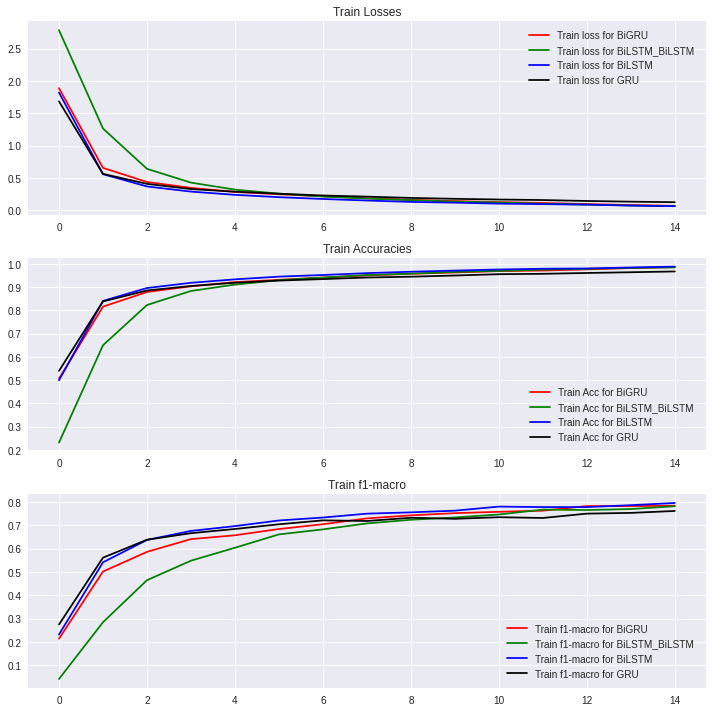

In [71]:
%matplotlib inline
import mpld3
import matplotlib
mpld3.enable_notebook()
#matplotlib.use('nbagg')
fig, axs=plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(train_bigru_ep, train_loss_bigru_list, label='Train loss for BiGRU', color='r')
axs[0].plot(train_bilstm_bilstm_ep, train_loss_bilstm_bilstm_list, label='Train loss for BiLSTM_BiLSTM ', color='g')
axs[0].plot(train_bilstm_ep, train_loss_bilstm_list, label='Train loss for BiLSTM', color='b')
axs[0].plot(train_gru_ep, train_loss_gru_list, label='Train loss for GRU', color='black')
axs[0].legend()
axs[0].set_title('Train Losses')

axs[1].plot(train_bigru_ep, train_acc_bigru_list, label='Train Acc for BiGRU', color='r')
axs[1].plot(train_bilstm_bilstm_ep, train_acc_bilstm_bilstm_list, label='Train Acc for BiLSTM_BiLSTM ', color='g')
axs[1].plot(train_bilstm_ep, train_acc_bilstm_list, label='Train Acc for BiLSTM', color='b')
axs[1].plot(train_gru_ep, train_acc_gru_list, label='Train Acc for GRU', color='black')
axs[1].legend()
axs[1].set_title('Train Accuracies')

axs[2].plot(train_bigru_ep, train_f1_bigru_list, label='Train f1-macro for BiGRU', color='r')
axs[2].plot(train_bilstm_bilstm_ep, train_f1_bilstm_bilstm_list, label='Train f1-macro for BiLSTM_BiLSTM ', color='g')
axs[2].plot(train_bilstm_ep, train_f1_bilstm_list, label='Train f1-macro for BiLSTM', color='b')
axs[2].plot(train_gru_ep, train_f1_gru_list, label='Train f1-macro for GRU', color='black')
axs[2].legend()

axs[2].set_title('Train f1-macro')
fig.tight_layout()
plt.show()


###Validation 

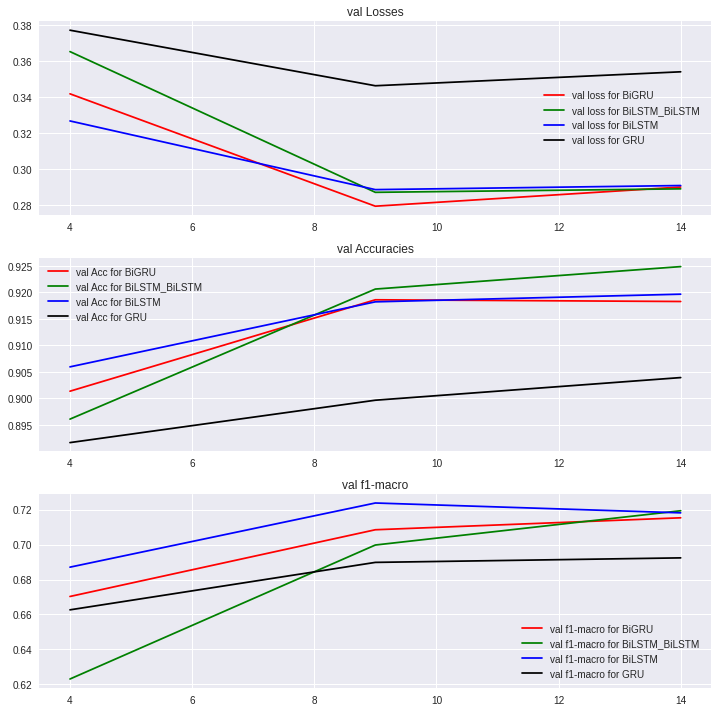

In [72]:
%matplotlib inline
import mpld3
import matplotlib
mpld3.enable_notebook()
#matplotlib.use('nbagg')
fig, axs=plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(val_bigru_ep, val_loss_bigru_list, label='val loss for BiGRU', color='r')
axs[0].plot(val_bilstm_bilstm_ep, val_loss_bilstm_bilstm_list, label='val loss for BiLSTM_BiLSTM ', color='g')
axs[0].plot(val_bilstm_ep, val_loss_bilstm_list, label='val loss for BiLSTM', color='b')
axs[0].plot(val_gru_ep, val_loss_gru_list, label='val loss for GRU', color='black')
axs[0].legend()
axs[0].set_title('val Losses')

axs[1].plot(val_bigru_ep, val_acc_bigru_list, label='val Acc for BiGRU', color='r')
axs[1].plot(val_bilstm_bilstm_ep, val_acc_bilstm_bilstm_list, label='val Acc for BiLSTM_BiLSTM ', color='g')
axs[1].plot(val_bilstm_ep, val_acc_bilstm_list, label='val Acc for BiLSTM', color='b')
axs[1].plot(val_gru_ep, val_acc_gru_list, label='val Acc for GRU', color='black')
axs[1].legend()
axs[1].set_title('val Accuracies')

axs[2].plot(val_bigru_ep, val_f1_bigru_list, label='val f1-macro for BiGRU', color='r')
axs[2].plot(val_bilstm_bilstm_ep, val_f1_bilstm_bilstm_list, label='val f1-macro for BiLSTM_BiLSTM ', color='g')
axs[2].plot(val_bilstm_ep, val_f1_bilstm_list, label='val f1-macro for BiLSTM', color='b')
axs[2].plot(val_gru_ep, val_f1_gru_list, label='val f1-macro for GRU', color='black')
axs[2].legend()

axs[2].set_title('val f1-macro')
fig.tight_layout()
plt.show()


###Evaluation of test Set on the best two models

In [73]:
test_seq_len = 1000 
test_model = RNNModel3(tag_vocab_size, test_seq_len, build_embedding_matrix_v4, batch_size, latent_dim)
test_model.build()
test_model.weights(third_model)
test_loss_obj = tf.keras.metrics.Mean(name='test_loss')
test_f1_obj = tf.keras.metrics.Mean(name='test_f1')
test_acc_obj = tf.keras.metrics.Accuracy(name='test_accuracy')
test_data = DataLoaders(df_test, test_seq_len, batch_size)
test_data.shuffle()
y_acc, pred_acc = [], []

for x, y in test_data:
    predictions = val_step(test_model, x)
    test_model.metrics(y, predictions, test_loss_obj, test_acc_obj, test_f1_obj)
    y_acc += list(y.numpy().flatten())
    pred_acc += list(np.argmax(predictions, axis=2).flatten())
    test_loss=test_loss_obj.result().numpy()
    test_acc=test_acc_obj.result().numpy()
    test_f1=test_f1_obj.result().numpy()
print("loss={} \t accuracy= {} \t f1-macro= {}".format(round(float(test_loss), 4), round(float(test_acc), 4),round(float(test_f1), 4)))

loss=0.262 	 accuracy= 0.9263 	 f1-macro= 0.702


###Error Analysis

In [58]:
def confusion_matrix_function(y_acc,pred_acc):
  cm = confusion_matrix(y_acc, pred_acc)[1:,1:]
  cm = cm.astype('int') 
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[index_to_tag[y] for y in list(set(y_acc))][1:]) 
  fig = plt.figure(figsize=(25,25))
  ax = fig.add_subplot(111)
  disp.plot(include_values=True, ax=ax,values_format='.10g', cmap='magma');
  plt.show()

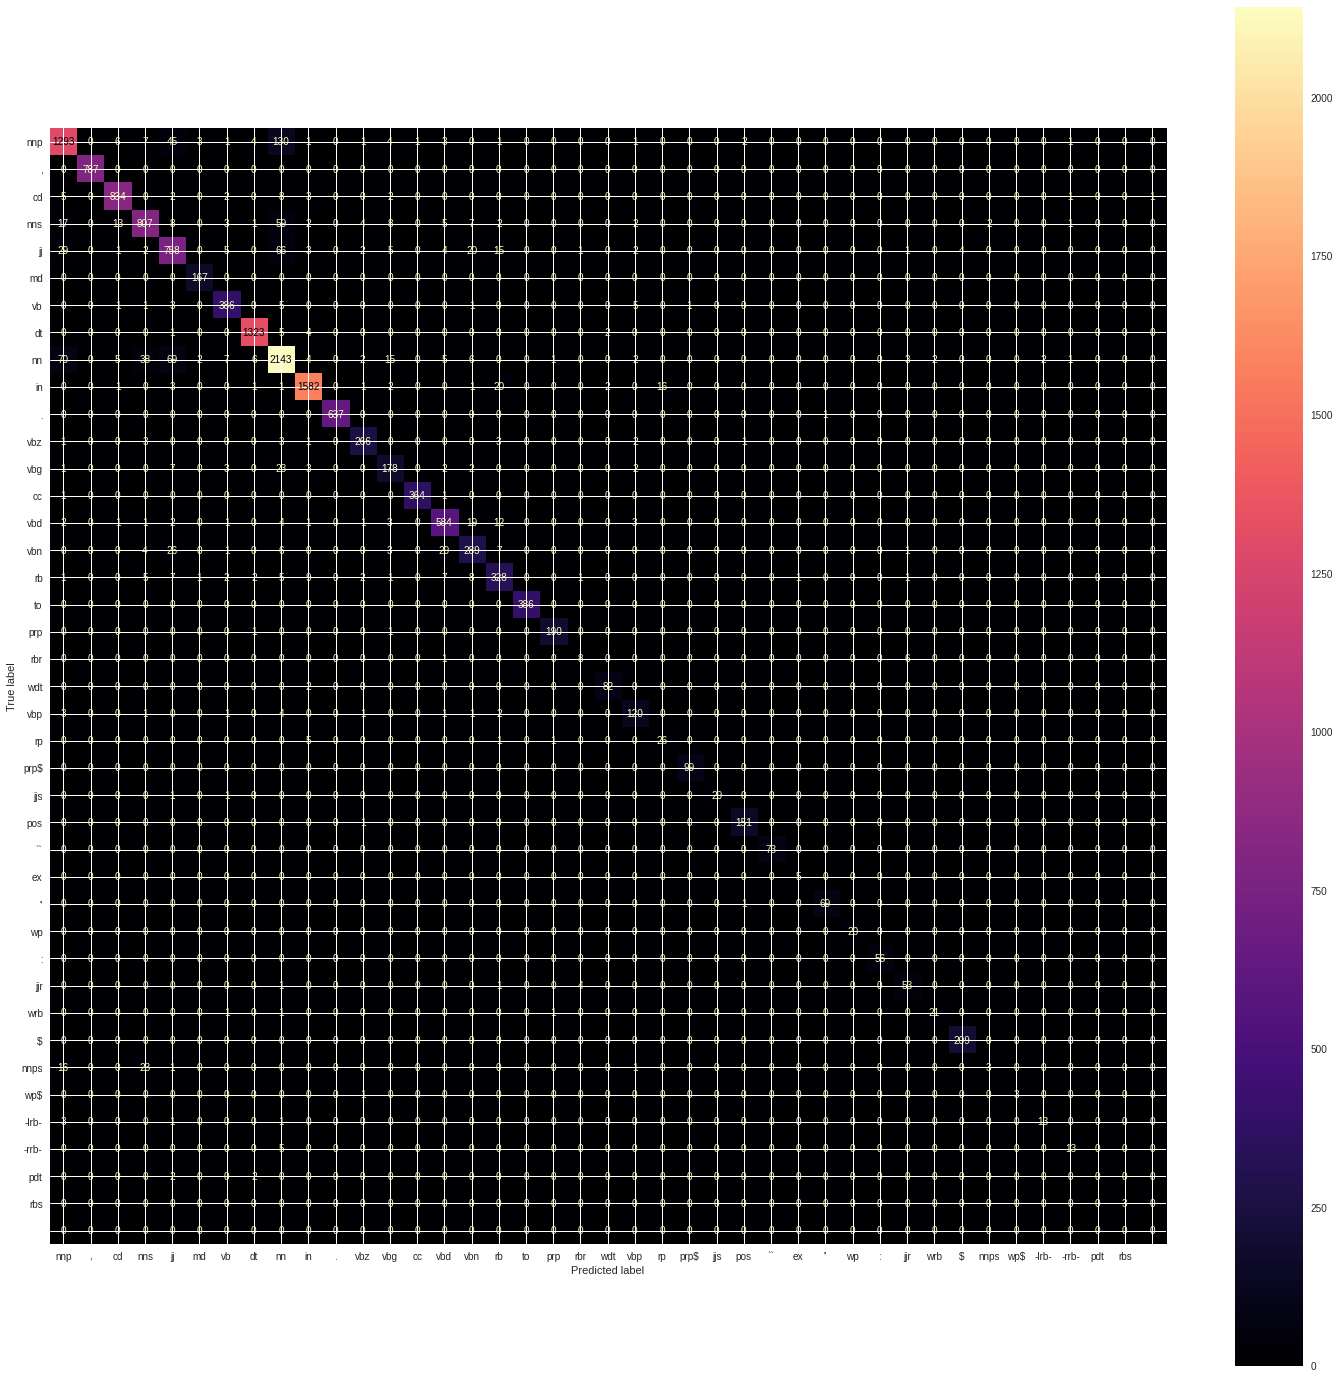

In [59]:
confusion_matrix_function(y_acc, pred_acc)

In [74]:
test_seq_len = 1000 
test_model = RNNModel1(tag_vocab_size, test_seq_len, build_embedding_matrix_v4, batch_size, latent_dim)
test_model.build()
test_model.weights(first_model)
test_loss_obj = tf.keras.metrics.Mean(name='test_loss')
test_f1_obj = tf.keras.metrics.Mean(name='test_f1')
test_acc_obj = tf.keras.metrics.Accuracy(name='test_accuracy')
test_data = DataLoaders(df_test, test_seq_len, batch_size)
test_data.shuffle()
y_acc, pred_acc = [], []

for x, y in test_data:
    predictions = val_step(test_model, x)
    test_model.metrics(y, predictions, test_loss_obj, test_acc_obj, test_f1_obj)
    y_acc += list(y.numpy().flatten())
    pred_acc += list(np.argmax(predictions, axis=2).flatten())
    test_loss=test_loss_obj.result().numpy()
    test_acc=test_acc_obj.result().numpy()
    test_f1=test_f1_obj.result().numpy()
print("loss={} \t accuracy= {} \t f1-macro= {}".format(round(float(test_loss), 4), round(float(test_acc), 4),round(float(test_f1), 4)))

loss=0.259 	 accuracy= 0.9238 	 f1-macro= 0.6958


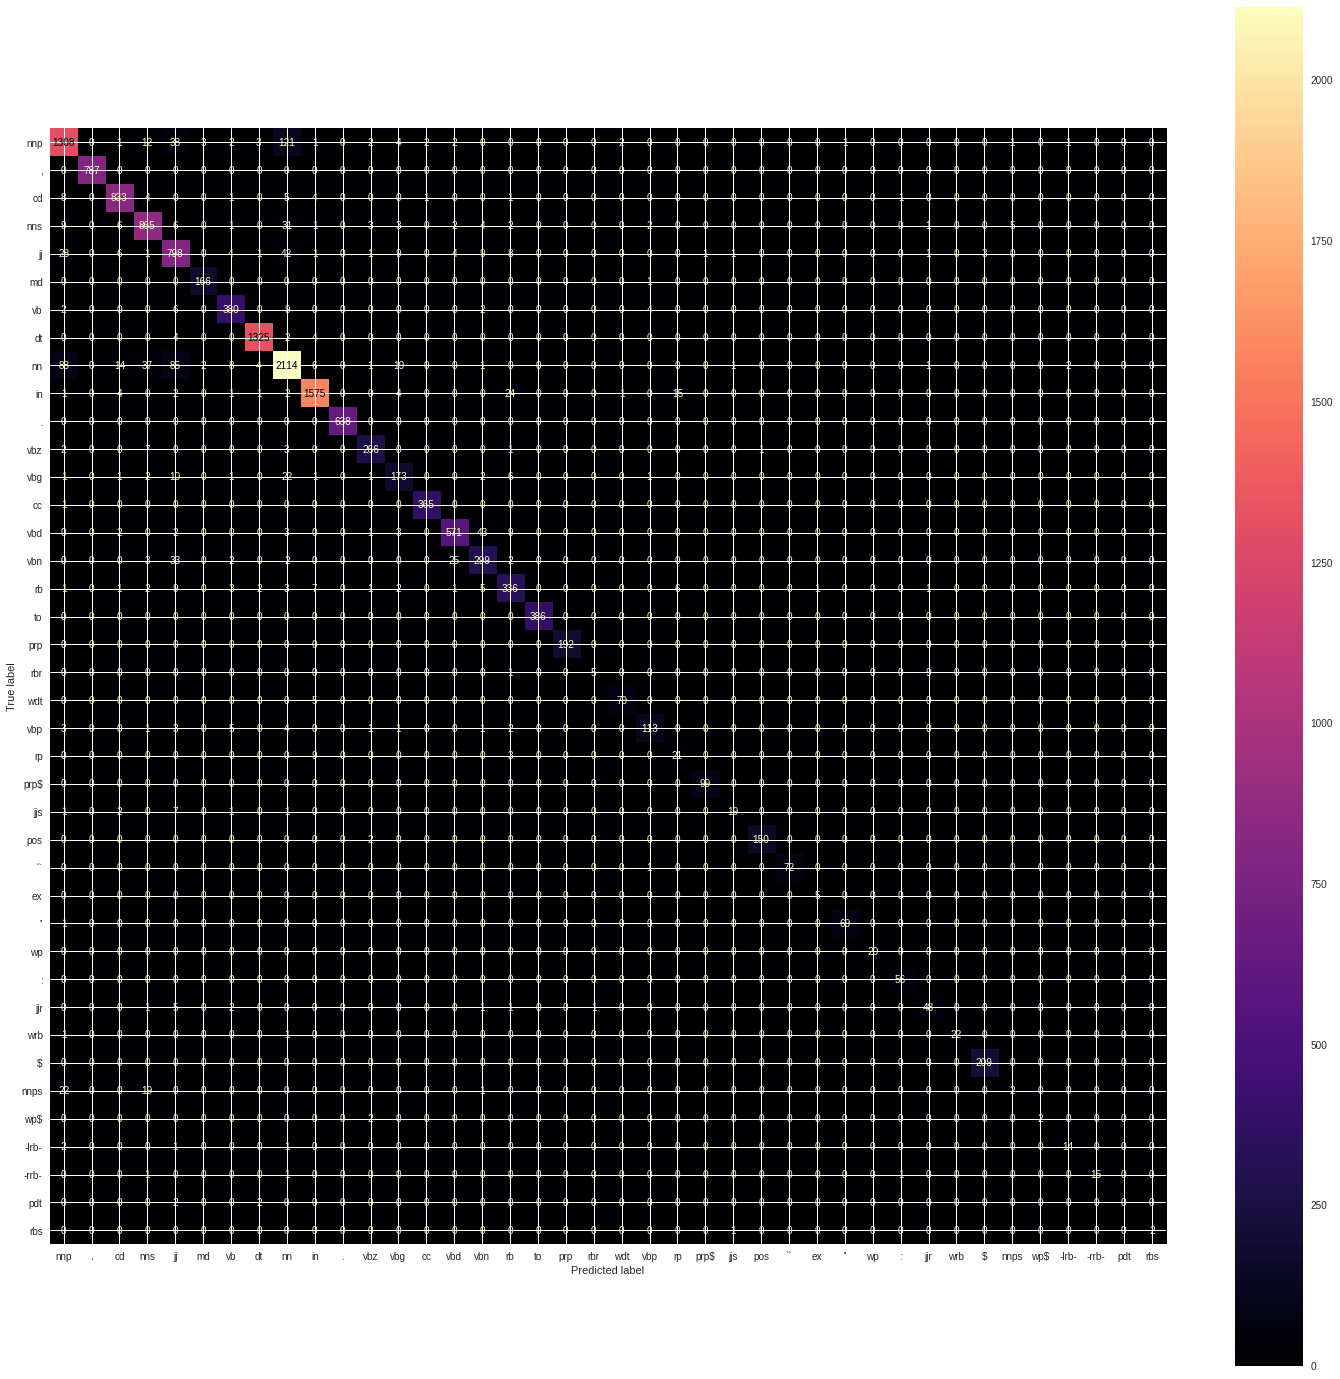

In [64]:
confusion_matrix_function(y_acc, pred_acc)

Most of the code blocks were taken from a notebook as part of an assignment for the NLP course.